In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings("ignore")

In [4]:
# datset exploration
folder_file_counts = {}

for root, dirs, files in os.walk("music_genre_dataset/Data/genres_original/"):
    print(root)
    print(len(files))



music_genre_dataset/Data/genres_original/
0
music_genre_dataset/Data/genres_original/blues
100
music_genre_dataset/Data/genres_original/classical
100
music_genre_dataset/Data/genres_original/country
100
music_genre_dataset/Data/genres_original/disco
100
music_genre_dataset/Data/genres_original/hiphop
100
music_genre_dataset/Data/genres_original/jazz
100
music_genre_dataset/Data/genres_original/metal
100
music_genre_dataset/Data/genres_original/pop
100
music_genre_dataset/Data/genres_original/reggae
100
music_genre_dataset/Data/genres_original/rock
100


# We will be working directly with music files, we have wav files in the datset

In [5]:
# testing with 1 file
file, sample_rate = librosa.load("music_genre_dataset/Data/genres_original/blues/blues.00000.wav")
file, sample_rate, file.shape

(array([ 0.00732422,  0.01660156,  0.00762939, ..., -0.05560303,
        -0.06106567, -0.06417847], dtype=float32),
 22050,
 (661794,))

In [6]:
# trim to get rid of silent parts if any
target_audio, index = librosa.effects.trim(file)
target_audio.shape

(661794,)

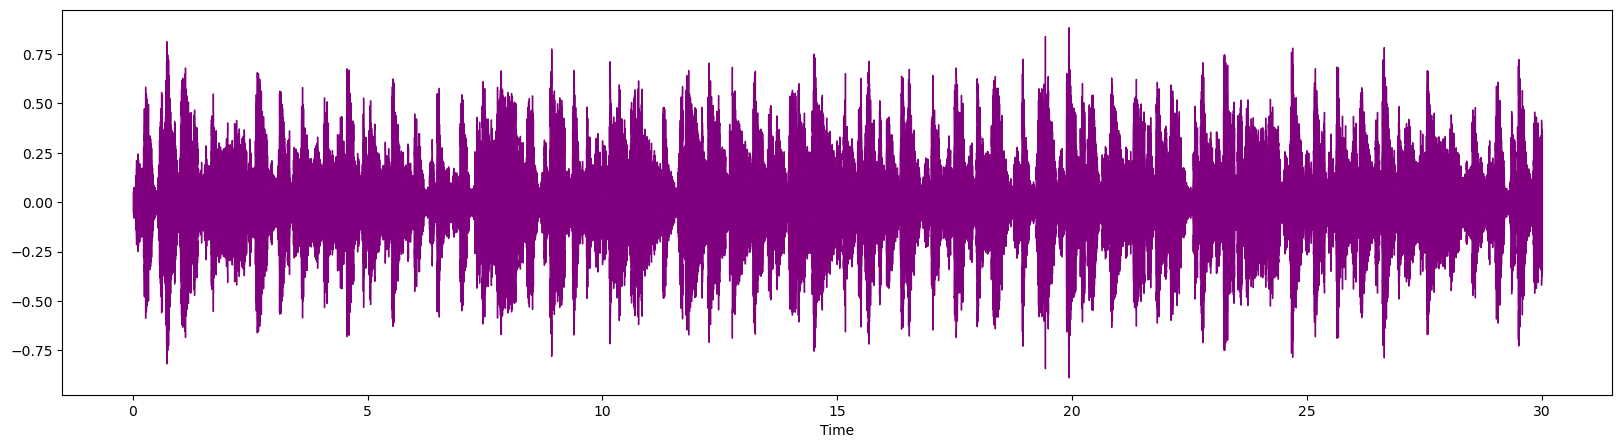

In [19]:
# show the audio file
plt.figure(figsize = (20, 5))
librosa.display.waveshow(y = target_audio, color = "purple")

# Chroma

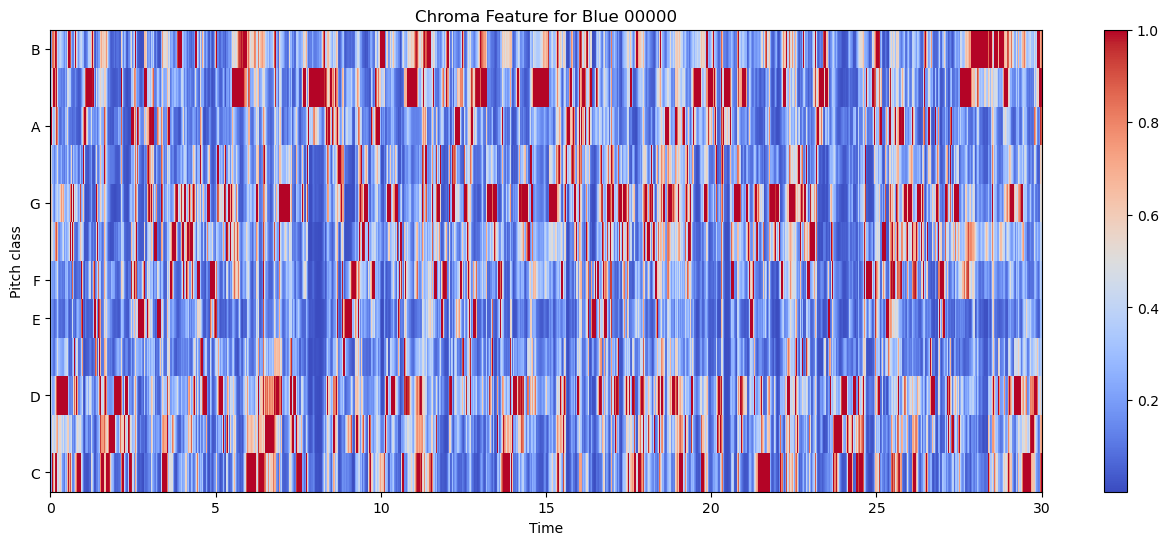

In [22]:
chroma = librosa.feature.chroma_stft(y = file, sr = sr)
plt.figure(figsize = (16,6))
librosa.display.specshow(chroma, sr = sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title('Chroma Feature for Blue 00000')
plt.show()

# Image dataset

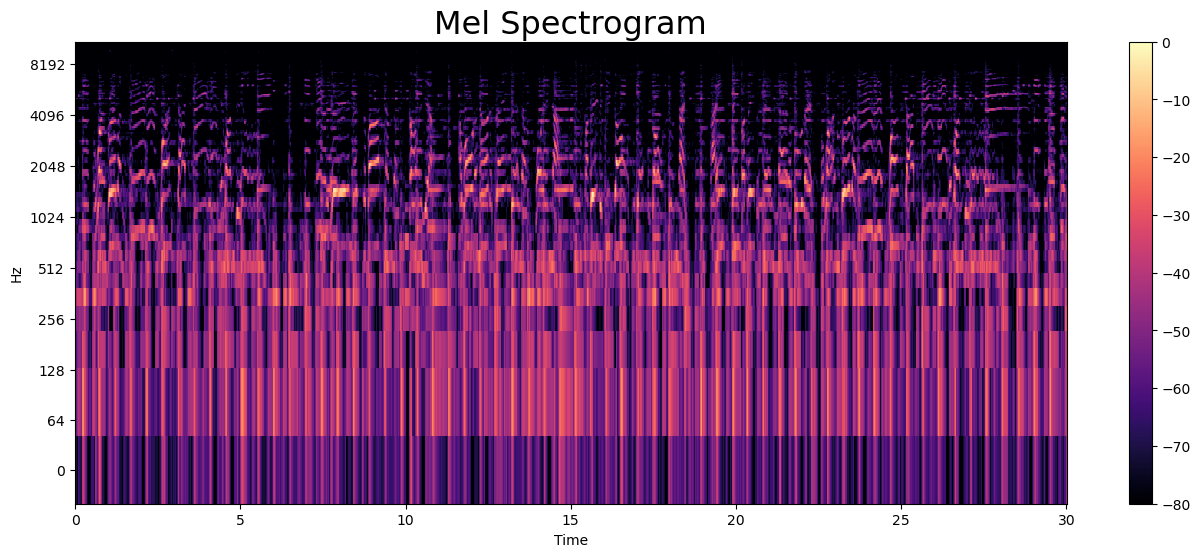

In [18]:
# collected from https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/discussion/397711
S = librosa.feature.melspectrogram(y=file, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=512, x_axis = 'time', y_axis = 'log',cmap = 'magma');
plt.colorbar();
plt.title("Mel Spectrogram", fontsize = 23);